# 2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
(punith)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
sal = pd.read_csv('Salary_Data.csv')

In [9]:
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
sal1 = sal.rename(columns={'YearsExperience' : 'YE','Salary':'Sal'})

In [13]:
sal1.describe()

,YE,Sal
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


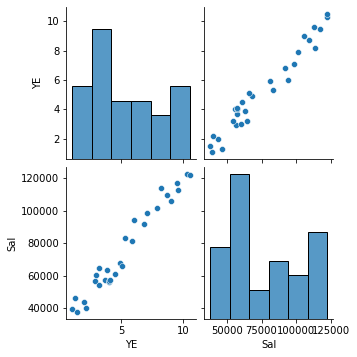

In [15]:
sns.pairplot(sal1)

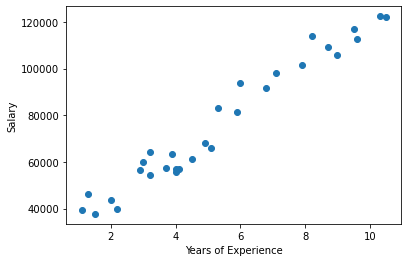

In [17]:
plt.scatter(x=sal1['YE'],y=sal1['Sal'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [19]:
sal1['YE'].corr(sal1['Sal'])

0.9782416184887599

In [21]:
np.corrcoef(sal1['YE'],sal1['Sal'])

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [23]:
model_y = smf.ols("YE~Sal",data=sal1).fit()

In [25]:
model_y.params

Intercept   -2.383161
Sal          0.000101
dtype: float64

In [27]:
model_y.params

Intercept   -2.383161
Sal          0.000101
dtype: float64

In [29]:
model_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     YE   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        16:23:25   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Sal            0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model_y.conf_int(0.05)

,0,1
Intercept,-3.053603,-1.712718
Sal,0.000093,0.000110


In [34]:
prediction = model_y.predict(sal1.iloc[:,1])
prediction

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

In [56]:
#train test split from sklearn- spliting data for X and Y

X = np.array([sal1['YE']]).reshape(-1,1)
y = np.array([sal1['Sal']]).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25)

In [57]:
X_train

array([[ 5.1],
       [ 1.1],
       [ 9. ],
       [ 3.7],
       [ 9.5],
       [ 5.9],
       [ 3.2],
       [ 1.5],
       [10.3],
       [ 7.1],
       [ 4.5],
       [ 6.8],
       [ 4.1],
       [ 6. ],
       [ 4. ],
       [ 5.3],
       [10.5],
       [ 1.3],
       [ 3.2],
       [ 7.9],
       [ 8.7],
       [ 2.9]])

In [58]:
y_train

array([[ 66029.],
       [ 39343.],
       [105582.],
       [ 57189.],
       [116969.],
       [ 81363.],
       [ 54445.],
       [ 37731.],
       [122391.],
       [ 98273.],
       [ 61111.],
       [ 91738.],
       [ 57081.],
       [ 93940.],
       [ 55794.],
       [ 83088.],
       [121872.],
       [ 46205.],
       [ 64445.],
       [101302.],
       [109431.],
       [ 56642.]])

In [59]:
l_model = LinearRegression().fit(X_train,y_train)

In [66]:
l_model.score(X_test,y_test)*100

94.87459785337845

In [67]:
X_test

array([[3.9],
       [4. ],
       [2.2],
       [2. ],
       [8.2],
       [3. ],
       [4.9],
       [9.6]])

In [69]:
y_test

array([[ 63218.],
       [ 56957.],
       [ 39891.],
       [ 43525.],
       [113812.],
       [ 60150.],
       [ 67938.],
       [112635.]])

In [71]:
pred_y = l_model.predict(X_test)
pred_y

array([[ 63220.54135059],
       [ 64145.43545753],
       [ 47497.34153248],
       [ 45647.55331859],
       [102990.98794932],
       [ 54896.49438806],
       [ 72469.48242006],
       [115939.50544658]])

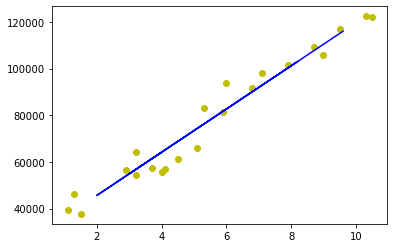

In [72]:
#Visualization for predicted model
plt.scatter(X_train,y_train, color='y')
plt.plot(X_test,pred_y,color='b')
plt.show()